In [ ]:
import numpy as np
import pandas as pd
import matplotlib.pyplot as plt
import seaborn as sns
from textblob import TextBlob
from wordcloud import WordCloud
import plotly.graph_objects as go
from collections import defaultdict

In [ ]:
congress=pd.read_csv('/content/rahulgandhi(1).csv')
bjp=pd.read_csv('/content/modi(1).csv')

In [ ]:
print(congress)

               user                                               Text
0    sheryl28097236  @RahulGandhi No mail in voting! No cheating sl...
1      AngryRacoon2  @RahulGandhi You already can in literally ever...
2     Susie01427353  @RahulGandhi Your supporters can go out anytim...
3        TD36742348  @RahulGandhi He also was interviewed by ''@Rah...
4           tpw8791  @RahulGandhi But he sent the ballot in for him...
..              ...                                                ...
385       ZibaLady1  @RahulGandhiVote #Congress and if you want a L...
386      unclezgolf                         @RahulGandhi#Vote4Congress
387     12GASHOTGUN  @RahulGandhiCongress party will make sure that...
388          xierh5  @RahulGandhiWe hope that Congress will definit...
389  GentlemenToxic  @RahulGandhiLET'S BRING CONGRESS BACK! @rahulg...

[390 rows x 2 columns]


In [ ]:
print(bjp)

                user                                               Text
0        MarkHodder3  @narendramodi And weâ€™ll find out who won in ...
1         K87327961G  @narendramodi Your BJP Nazi Party cannot be tr...
2           OldlaceA                    @narendramodi So did Lying Barr
3         penblogger  @narendramodi It's clear you didnt compose thi...
4       Aquarian0264     @narendramodi I will vote in person thank you.
..               ...                                                ...
363  klassylady20069  @narendramodiPlease ensure massive BJP win and...
364         Bdubbs76  @narendramodiFrustration of opposition in #bic...
365       schristle2  @narendramodiIdk if this sounds unreal, but wh...
366     calonimamu10              @narendramodi#BJP losing all 5 states
367      Gary1carson  @narendramodi I really don't understand this l...

[368 rows x 2 columns]


In [ ]:
congress.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 390 entries, 0 to 389
Data columns (total 2 columns):
 #   Column  Non-Null Count  Dtype 
---  ------  --------------  ----- 
 0   user    390 non-null    object
 1   Text    390 non-null    object
dtypes: object(2)
memory usage: 6.2+ KB


In [ ]:
bjp.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 368 entries, 0 to 367
Data columns (total 2 columns):
 #   Column  Non-Null Count  Dtype 
---  ------  --------------  ----- 
 0   user    368 non-null    object
 1   Text    368 non-null    object
dtypes: object(2)
memory usage: 5.9+ KB


In [ ]:
congress.head()

,user,Text
0,sheryl28097236,@RahulGandhi No mail in voting! No cheating sl...
1,AngryRacoon2,@RahulGandhi You already can in literally ever...
2,Susie01427353,@RahulGandhi Your supporters can go out anytim...
3,TD36742348,@RahulGandhi He also was interviewed by ''@Rah...
4,tpw8791,@RahulGandhi But he sent the ballot in for him...


In [ ]:
bjp.head()

,user,Text
0,MarkHodder3,@narendramodi And weâ€™ll find out who won in ...
1,K87327961G,@narendramodi Your BJP Nazi Party cannot be tr...
2,OldlaceA,@narendramodi So did Lying Barr
3,penblogger,@narendramodi It's clear you didnt compose thi...
4,Aquarian0264,@narendramodi I will vote in person thank you.


In [ ]:
congress['Text'][150]

"@RahulGandhi 22% of mail in ballots never get counted. Let's change this before November? Lol"

In [ ]:
TextBlob(congress['Text'][150]).sentiment

Sentiment(polarity=0.8, subjectivity=0.7)

In [ ]:
bjp['Text'][250]

'@narendramodiWhat is the point in diverting secular votes to VBA or NOTA? It only helps BJP.  Why help BJP win? It will be a definite disaster?'

In [ ]:
TextBlob(bjp['Text'][250]).sentiment

Sentiment(polarity=0.26666666666666666, subjectivity=0.6333333333333333)

In [ ]:
def polarity(review):
  return TextBlob(review).sentiment.polarity

In [ ]:
congress['polarity']=congress['Text'].apply(polarity)
bjp['polarity']=bjp['Text'].apply(polarity)

In [ ]:
congress.head()

,user,Text,polarity
0,sheryl28097236,@RahulGandhi No mail in voting! No cheating sl...,0.0
1,AngryRacoon2,@RahulGandhi You already can in literally ever...,0.0
2,Susie01427353,@RahulGandhi Your supporters can go out anytim...,0.0
3,TD36742348,@RahulGandhi He also was interviewed by ''@Rah...,-0.4
4,tpw8791,@RahulGandhi But he sent the ballot in for him...,0.1


In [ ]:
bjp.head()

,user,Text,polarity
0,MarkHodder3,@narendramodi And weâ€™ll find out who won in ...,0.00
1,K87327961G,@narendramodi Your BJP Nazi Party cannot be tr...,0.00
2,OldlaceA,@narendramodi So did Lying Barr,0.00
3,penblogger,@narendramodi It's clear you didnt compose thi...,0.05
4,Aquarian0264,@narendramodi I will vote in person thank you.,0.00


In [ ]:
congress['Expression']=np.where(congress['polarity']>0,'Positive','Negative')
congress.loc[congress.polarity == 0,'Expression'] = 'Neutral'
congress.head()

,user,Text,polarity,Expression
0,sheryl28097236,@RahulGandhi No mail in voting! No cheating sl...,0.0,Neutral
1,AngryRacoon2,@RahulGandhi You already can in literally ever...,0.0,Neutral
2,Susie01427353,@RahulGandhi Your supporters can go out anytim...,0.0,Neutral
3,TD36742348,@RahulGandhi He also was interviewed by ''@Rah...,-0.4,Negative
4,tpw8791,@RahulGandhi But he sent the ballot in for him...,0.1,Positive


In [ ]:
bjp['Expression']=np.where(bjp['polarity']>0,'Positive','Negative')
bjp.loc[bjp.polarity == 0,'Expression'] = 'Neutral'
bjp.head()

,user,Text,polarity,Expression
0,MarkHodder3,@narendramodi And weâ€™ll find out who won in ...,0.00,Neutral
1,K87327961G,@narendramodi Your BJP Nazi Party cannot be tr...,0.00,Neutral
2,OldlaceA,@narendramodi So did Lying Barr,0.00,Neutral
3,penblogger,@narendramodi It's clear you didnt compose thi...,0.05,Positive
4,Aquarian0264,@narendramodi I will vote in person thank you.,0.00,Neutral


In [ ]:
def exp_graph(reviews,title):
  group=reviews.groupby('Expression').count()
  pol_count=list(group['polarity'])
  exp=list(group.index)

  group_list=list(zip(pol_count,exp))
  df=pd.DataFrame(group_list,columns=['pol_count','exp'])

  df['color']='rgb(14,185,54)'
  df.loc[df.exp=='Neutral','color']='rgb(18,29,31)'
  df.loc[df.exp=='Negative','color']='rgb(206,31,31)'

  go.Figure(go.Bar(x=df['pol_count'],
                   y=df['exp'],orientation='h',
                   marker={'color':df['color']})).update_layout(title_text=title).show()

In [ ]:
exp_graph(congress,'Analysis for congress')

In [ ]:
exp_graph(bjp,'Analysis for bjp')

In [ ]:
congress[congress['polarity']==0].shape

(218, 4)

In [ ]:
bjp[bjp['polarity']==0].shape

(166, 4)

In [ ]:
congress[congress['polarity']<0].shape

(52, 4)

In [ ]:
bjp[bjp['polarity']<0].shape

(58, 4)

In [ ]:
congress[congress['polarity']>0].shape

(120, 4)

In [ ]:
bjp[bjp['polarity']>0].shape

(144, 4)

In [ ]:
congress.drop((congress[congress['polarity']==0]).index,inplace=True)
print(congress.shape)
bjp.drop((bjp[bjp['polarity']==0]).index,inplace=True)
print(bjp.shape)

(172, 4)
(202, 4)


In [ ]:
def balanced_data(reviews,n):
  np.random.seed(10)
  drop=np.random.choice(reviews.index,n,replace=False)
  review_subset=reviews.drop(drop)
  return review_subset

In [ ]:
congress_subset=balanced_data(congress,2)
print(congress_subset.shape)
bjp_subset=balanced_data(bjp,32)
print(bjp_subset.shape)

(170, 4)
(170, 4)


<ipython-input-31-d2945c74cb82>:1: UserWarning:



`distplot` is a deprecated function and will be removed in seaborn v0.14.0.

Please adapt your code to use either `displot` (a figure-level function with
similar flexibility) or `histplot` (an axes-level function for histograms).

For a guide to updating your code to use the new functions, please see
https://gist.github.com/mwaskom/de44147ed2974457ad6372750bbe5751




<Axes: xlabel='polarity', ylabel='Density'>

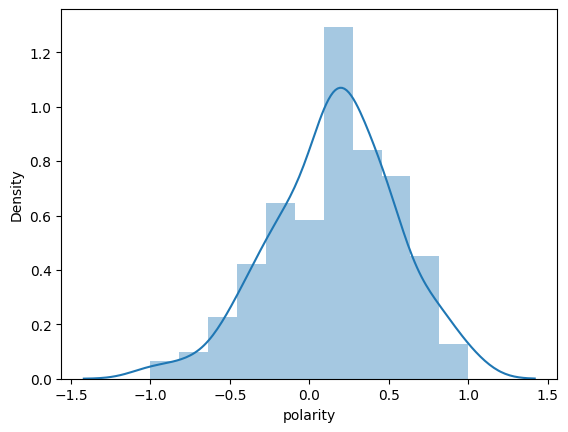

In [ ]:
sns.distplot(congress_subset['polarity'])

<ipython-input-32-462bf923bbc8>:1: UserWarning:



`distplot` is a deprecated function and will be removed in seaborn v0.14.0.

Please adapt your code to use either `displot` (a figure-level function with
similar flexibility) or `histplot` (an axes-level function for histograms).

For a guide to updating your code to use the new functions, please see
https://gist.github.com/mwaskom/de44147ed2974457ad6372750bbe5751




<Axes: xlabel='polarity', ylabel='Density'>

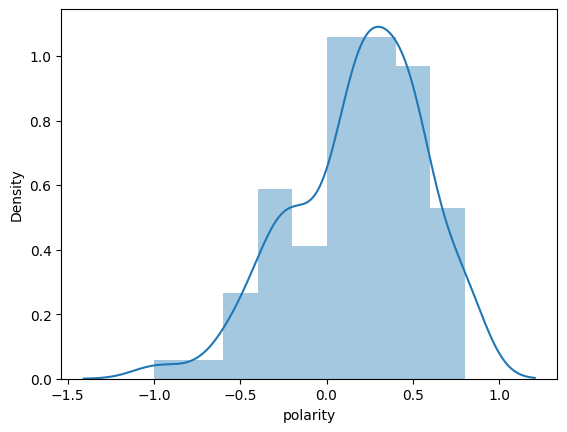

In [ ]:
sns.distplot(bjp_subset['polarity'])

In [ ]:
congress_subset.groupby('Expression').count()

,user,Text,polarity
Expression,,,
Negative,51,51,51
Positive,119,119,119


In [ ]:
bjp_subset.groupby('Expression').count()

,user,Text,polarity
Expression,,,
Negative,47,47,47
Positive,123,123,123


In [ ]:
def pol_percent(subset,total):
  neg_percent=((subset.groupby('Expression').count())['polarity'][0]/total)*100
  pos_percent=((subset.groupby('Expression').count())['polarity'][1]/total)*100

  return neg_percent,pos_percent

In [ ]:
congress_pol_percent=pol_percent(congress_subset,390)
print(congress_pol_percent)

bjp_pol_percent=pol_percent(bjp_subset,368)
print(bjp_pol_percent)

(13.076923076923078, 30.512820512820515)
(12.771739130434783, 33.42391304347826)


In [ ]:
candidate=['congress','bjp']
pos=[congress_pol_percent[1],bjp_pol_percent[1]]
neg=[congress_pol_percent[0],bjp_pol_percent[0]]

go.Figure(data=[
    go.Bar(name='positive',x=candidate,y=pos),
    go.Bar(name='negative',x=candidate,y=neg),
])

In [ ]:
congress_total_percent=pol_percent(congress_subset,500)
congress_total_percent

(10.2, 23.799999999999997)

In [ ]:
bjp_total_percent=pol_percent(bjp_subset,500)
bjp_total_percent

(9.4, 24.6)

In [ ]:
congress_pos=congress_total_percent[1]+bjp_total_percent[0]
print(congress_pos)
bjp_pos=congress_total_percent[0]+bjp_total_percent[1]
print(bjp_pos)

33.199999999999996
34.8


In [ ]:
go.Figure(go.Bar(y=['Congress\'s Favour' ,'Bjp\'s Favour'],
                 x=[congress_pos,bjp_pos],
                 marker={'color':['rgb(100,200,150)','rgb(90,150,200)']},
                 orientation='h')).update_layout(title_text='Public Sentiment')

In [ ]:
def pos_tweets(tweets,title):
  most_pos_text=tweets[tweets['polarity']==0.5].Text.head()
  most_pos_pol=tweets[tweets['polarity']==0.5].polarity.head()

  go.Figure(data=[go.Table(columnorder=[1,2],
                           columnwidth=[10,100],
                           header={'values':['polarity',title],'align':'left'},
                           cells={'values':[most_pos_pol,most_pos_text],'align':'left'}
                           )]).update_layout(title_text=title).show()

In [ ]:
pos_tweets(congress_subset,'positive tweets for congress')
pos_tweets(bjp_subset,'positive tweets for bjp')

In [ ]:
def neg_tweets(tweets,title):
  most_neg_text=tweets[tweets['polarity']==-1].Text.head()
  most_neg_pol=tweets[tweets['polarity']==-1].polarity.head()

  go.Figure(data=[go.Table(columnorder=[1,2],
                           columnwidth=[10,100],
                           header={'values':['polarity',title],'align':'left'},
                           cells={'values':[most_neg_pol,most_neg_text],'align':'left'}
                           )]).update_layout(title_text=title).show()

In [ ]:
neg_tweets(congress_subset,'negative tweets for congress')
neg_tweets(bjp_subset,'negative tweets for bjp')

In [ ]:
def wordcloud(data,title):
  Text=str(data.Text)
  wc=WordCloud(max_font_size=100,max_words=500,scale=10,relative_scaling=0.6,background_color='white').generate(Text)

  plt.figure(figsize=(15,10))
  plt.title(title,{'fontsize':30,'family':'serif'})
  plt.axis('off')
  plt.imshow(wc)

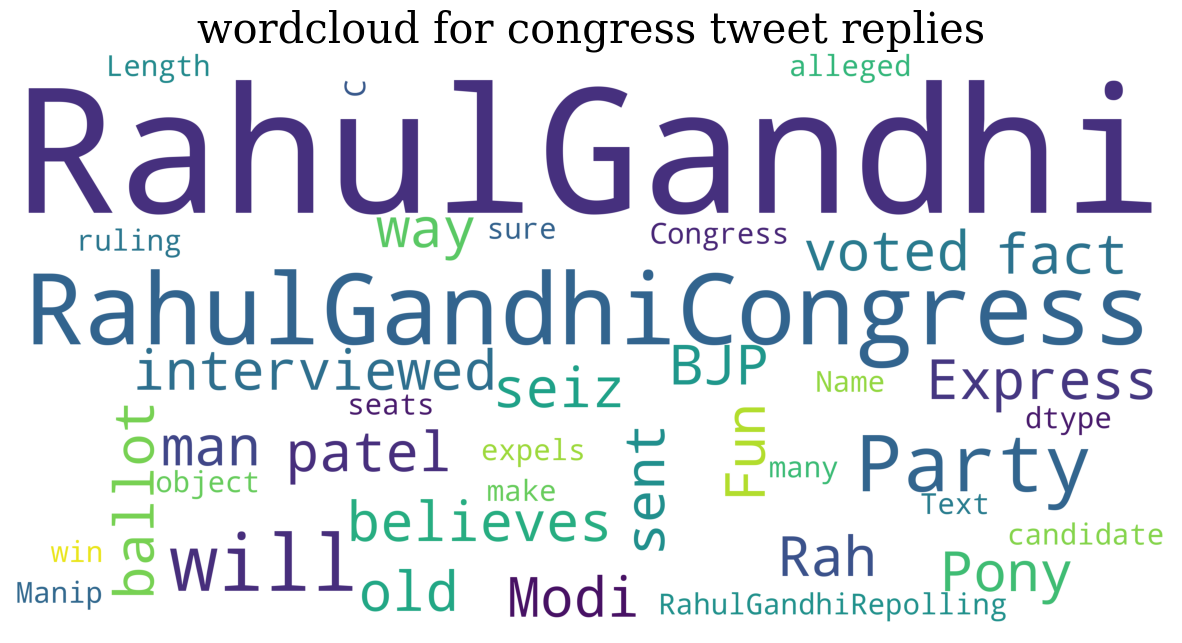

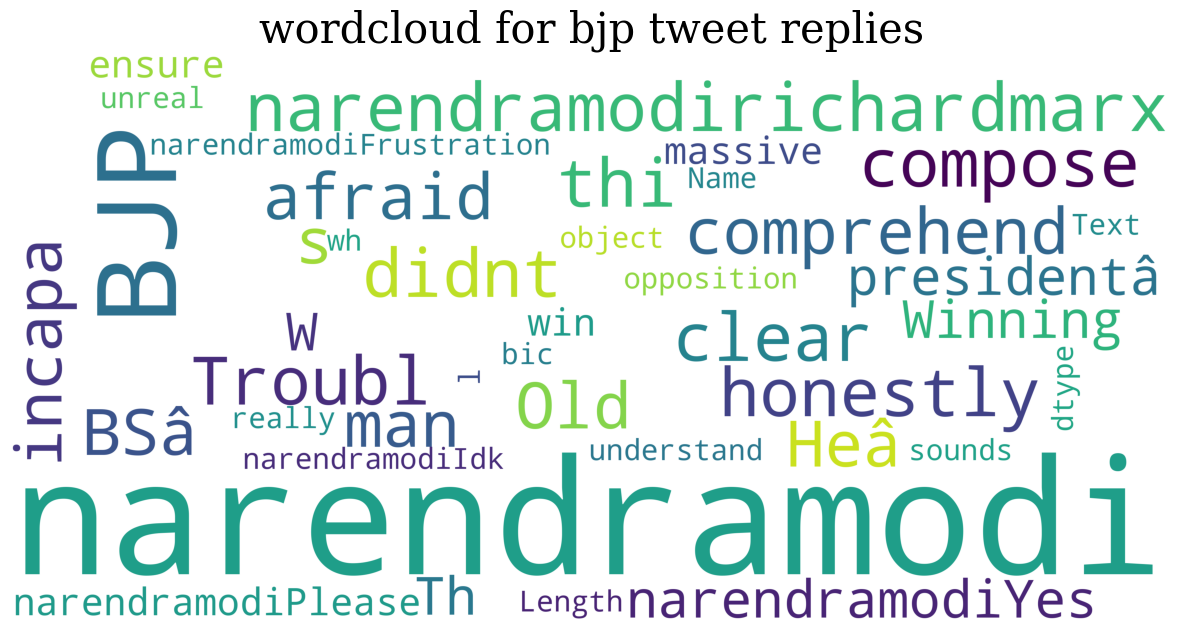

In [ ]:
wordcloud(congress_subset,'wordcloud for congress tweet replies')

wordcloud(bjp_subset,'wordcloud for bjp tweet replies')